<div style="display: flex; background-color: #3F579F;">
    <h1 style="margin: auto; font-weight: bold; padding: 30px 30px 0px 30px;" align="center">Automatically classify consumer goods - P6</h1>
</div>
<div style="display: flex; background-color: #3F579F; margin: auto; padding: 5px 30px 0px 30px;" >
    <h3 style="width: 100%; text-align: center; float: left; font-size: 24px;" align="center">| Text analysis notebook |</h3>
</div>
<div style="display: flex; background-color: #3F579F; margin: auto; padding: 10px 30px 30px 30px;">
    <h4 style="width: 100%; text-align: center; float: left; font-size: 24px;" align="center">Data Scientist course - OpenClassrooms</h4>
</div>

<div style="background-color: #506AB9;" >
    <h2 style="margin: auto; padding: 20px; color:#fff; ">1. Libraries and functions</h2>
</div>

<div style="background-color: #6D83C5;" >
    <h3 style="margin: auto; padding: 20px; color:#fff; ">1.1. Libraries and functions</h3>
</div>

In [1]:
## General
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Own specific functions 
from functions import *

%matplotlib inline
sns.set_theme(style="darkgrid")


<div style="background-color: #506AB9;" >
    <h2 style="margin: auto; padding: 20px; color:#fff; ">2. Importing files and Initial analysis</h2>
</div>

<div style="background-color: #6D83C5;" >
    <h3 style="margin: auto; padding: 20px; color:#fff; ">2.1. Importing and preparing files</h3>
</div>

<div class="alert alert-block alert-info">
    We are going to load the dateset resulting from the RFM
</div>

In [2]:
data = pd.read_csv(r"datasets\flipkart_com-ecommerce_sample_1050.csv")

In [3]:
data.head()

,uniq_id,crawl_timestamp,product_url,product_name,product_category_tree,pid,retail_price,discounted_price,image,is_FK_Advantage_product,description,product_rating,overall_rating,brand,product_specifications
0,55b85ea15a1536d46b7190ad6fff8ce7,2016-04-30 03:22:56 +0000,http://www.flipkart.com/elegance-polyester-mul...,Elegance Polyester Multicolor Abstract Eyelet ...,"[""Home Furnishing >> Curtains & Accessories >>...",CRNEG7BKMFFYHQ8Z,1899.0,899.0,55b85ea15a1536d46b7190ad6fff8ce7.jpg,False,Key Features of Elegance Polyester Multicolor ...,No rating available,No rating available,Elegance,"{""product_specification""=>[{""key""=>""Brand"", ""v..."
1,7b72c92c2f6c40268628ec5f14c6d590,2016-04-30 03:22:56 +0000,http://www.flipkart.com/sathiyas-cotton-bath-t...,Sathiyas Cotton Bath Towel,"[""Baby Care >> Baby Bath & Skin >> Baby Bath T...",BTWEGFZHGBXPHZUH,600.0,449.0,7b72c92c2f6c40268628ec5f14c6d590.jpg,False,Specifications of Sathiyas Cotton Bath Towel (...,No rating available,No rating available,Sathiyas,"{""product_specification""=>[{""key""=>""Machine Wa..."
2,64d5d4a258243731dc7bbb1eef49ad74,2016-04-30 03:22:56 +0000,http://www.flipkart.com/eurospa-cotton-terry-f...,Eurospa Cotton Terry Face Towel Set,"[""Baby Care >> Baby Bath & Skin >> Baby Bath T...",BTWEG6SHXTDB2A2Y,NaN,NaN,64d5d4a258243731dc7bbb1eef49ad74.jpg,False,Key Features of Eurospa Cotton Terry Face Towe...,No rating available,No rating available,Eurospa,"{""product_specification""=>[{""key""=>""Material"",..."
3,d4684dcdc759dd9cdf41504698d737d8,2016-06-20 08:49:52 +0000,http://www.flipkart.com/santosh-royal-fashion-...,SANTOSH ROYAL FASHION Cotton Printed King size...,"[""Home Furnishing >> Bed Linen >> Bedsheets >>...",BDSEJT9UQWHDUBH4,2699.0,1299.0,d4684dcdc759dd9cdf41504698d737d8.jpg,False,Key Features of SANTOSH ROYAL FASHION Cotton P...,No rating available,No rating available,SANTOSH ROYAL FASHION,"{""product_specification""=>[{""key""=>""Brand"", ""v..."
4,6325b6870c54cd47be6ebfbffa620ec7,2016-06-20 08:49:52 +0000,http://www.flipkart.com/jaipur-print-cotton-fl...,Jaipur Print Cotton Floral King sized Double B...,"[""Home Furnishing >> Bed Linen >> Bedsheets >>...",BDSEJTHNGWVGWWQU,2599.0,698.0,6325b6870c54cd47be6ebfbffa620ec7.jpg,False,Key Features of Jaipur Print Cotton Floral Kin...,No rating available,No rating available,Jaipur Print,"{""product_specification""=>[{""key""=>""Machine Wa..."


<div style="background-color: #6D83C5;" >
    <h3 style="margin: auto; padding: 20px; color:#fff; ">2.2. Initial analysis</h3>
</div>

In [4]:
df_analysis(data, "data", columns=["uniq_id"], analysis_type="complete")


Analysis Header of data dataset
--------------------------------------------------------------------------------
- Dataset shape:			 1050 rows and 15 columns
- Total of NaN values:			 341
- Percentage of NaN:			 2.17 %
- Total of full duplicates rows:	 0
- Total of empty rows:			 0
- Total of empty columns:		 0
- Unique indexes:			 True
- Memory usage:				 116.0+ KB

- The key(s):	 ['uniq_id'] is not present multiple times in the dataframe. 
		 It CAN be used as a primary key.

Detailed analysis of data dataset
------------------------------------------------------------------------------------------------------------------------------------


,name,type,records,unique,# NaN,% NaN,mean,min,25%,50%,75%,max,std
0,uniq_id,object,1050,1050,0,0.00000,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,crawl_timestamp,object,1050,149,0,0.00000,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,product_url,object,1050,1050,0,0.00000,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,product_name,object,1050,1050,0,0.00000,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,product_category_tree,object,1050,642,0,0.00000,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,pid,object,1050,1050,0,0.00000,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,image,object,1050,1050,0,0.00000,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,is_FK_Advantage_product,bool,1050,2,0,0.00000,NaN,NaN,NaN,NaN,NaN,NaN,NaN
10,description,object,1050,1050,0,0.00000,NaN,NaN,NaN,NaN,NaN,NaN,NaN
11,product_rating,object,1050,27,0,0.00000,NaN,NaN,NaN,NaN,NaN,NaN,NaN


<div class="alert alert-block alert-info">
    <p>Plotting the percentage of missing values by features</p>
</div>

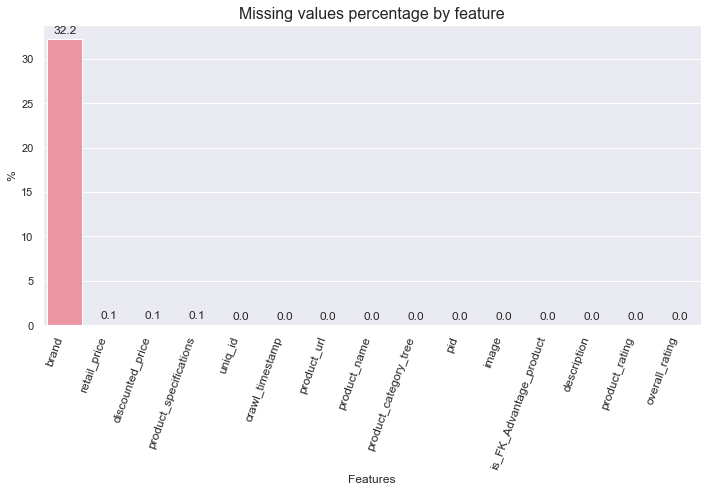

In [5]:
missing_values = data.isnull().sum(axis=0).sort_values(ascending=False)/len(data.index)*100

fig = plt.figure(figsize=(10, 7))
plot = sns.barplot(x=missing_values.index, y=missing_values.values)
for p in plot.patches:
    plot.annotate(format(p.get_height(), ".1f"), (p.get_x() + p.get_width() / 2., p.get_height()), 
                    ha="center", va="center", xytext=(0, 9), textcoords="offset points")
plot.set_xticklabels(labels=missing_values.index.tolist(), rotation=70, size=12, horizontalalignment="right")
plt.ylabel("%", size=12)
plt.xlabel("Features", size=12)
plt.title("Missing values percentage by feature", size=16)
plt.tight_layout()
plt.savefig("images/text_analysis/missing-values-percentage-by-feature.png")
plt.show()

<div class="alert alert-block alert-success">
    <p><b>Observations / Conclusions</b></p>
    <ul>
        <li>There are some features that are not important to our text analysis. For example, pid, uniq_id, etc.</li>
        <li>The missing value percentage is higher only in one feature.</li>
    </ul>
</div>

<div style="background-color: #506AB9;" >
    <h2 style="margin: auto; padding: 20px; color:#fff; ">3. Selecting the features to work</h2>
</div>

<div style="background-color: #6D83C5;" >
    <h3 style="margin: auto; padding: 20px; color:#fff; ">3.1. Analyzing the features</h3>
</div>

In [6]:
pd.set_option("display.max_rows", None) # show full of showing rows
pd.set_option("display.max_columns", None) # show full of showing cols
pd.set_option("display.max_colwidth", None) # show full width of showing cols
pd.set_option("display.float_format", lambda x: "%.5f" % x) # show full content in cell    

In [7]:
data.tail(1)

,uniq_id,crawl_timestamp,product_url,product_name,product_category_tree,pid,retail_price,discounted_price,image,is_FK_Advantage_product,description,product_rating,overall_rating,brand,product_specifications
1049,f2f027ad6a6df617c9f125173da71e44,2015-12-01 10:15:43 +0000,http://www.flipkart.com/uberlyfe-large-vinyl-sticker/p/itme2zepqqzr9jt5?pid=STIE2ZEPACRQJKH7,Uberlyfe Large Vinyl Sticker,"[""Baby Care >> Baby & Kids Gifts >> Stickers >> Uberlyfe Stickers""]",STIE2ZEPACRQJKH7,1190.00000,595.00000,f2f027ad6a6df617c9f125173da71e44.jpg,False,Buy Uberlyfe Large Vinyl Sticker for Rs.595 online. Uberlyfe Large Vinyl Sticker at best prices with FREE shipping & cash on delivery. Only Genuine Products. 30 Day Replacement Guarantee.,4,4,Uberlyfe,"{""product_specification""=>[{""key""=>""Sales Package"", ""value""=>""Sticker""}, {""key""=>""Brand"", ""value""=>""Uberlyfe""}, {""key""=>""Type"", ""value""=>""Vinyl""}, {""key""=>""Number of Stickers"", ""value""=>""1""}, {""key""=>""Size"", ""value""=>""Large""}]}"


In [8]:
pd.reset_option("display.max_rows") # reset max of showing rows
pd.reset_option("display.max_columns") # reset max of showing cols
pd.reset_option("display.max_colwidth") # reset width of showing cols
pd.reset_option("display.float_format") # reset show full content in cell

<div class="alert alert-block alert-info">
    <p>Let's analyze in detail the feature <b>brand</b></p>
</div>

In [9]:
data["brand"].unique()

array(['Elegance', 'Sathiyas', 'Eurospa', 'SANTOSH ROYAL FASHION',
       'Jaipur Print', nan, 'House This', 'Riva Carpets', 'Myesquire',
       'Dungri India Craft', 'BFT', 'JMD', 'Mom and Kid', "Kripa's",
       'Burt s Bees', 'AKUP', 'D-Link', 'Suave', 'RoQ', 'Cookart', 'JRB',
       'RYTHMX', 'Brillare Science', 'Mars', 'Aroma Care', 'KOHL',
       'Shopmania', 'CHHOTE JANAB', 'Prime', 'SKI', 'GAYATRI CREATIONS',
       'Caffeine', 'Garnet', 'Vitamins', 'KE', 'Giorgio Armani',
       'florence9', 'VarEesha', 'Treasure', 'CHINMAY KIDS', 'HEAVENLY',
       '@home', 'Smart Wall Guru', 'oxford', 'Eureka.in', 'Craft Trade',
       'Parv Collections', 'Exotic India', 'Aapno Rajasthan',
       'BeYOUtiful', 'My Angel', 'Diviniti', 'K&P', 'Rama',
       'Shop Rajasthan', 'Bestway', 'Artisan Creation', 'Remtex Export',
       'TWISHA', 'Eternity', 'FS Mini Klub', 'Omic', 'Filink', 'Recrafto',
       'FRENEMY', 'Quilt India', 'Toffyhouse', 'Shopizone', 'Craftcart',
       'SOS', 'Arsalan', '

<div class="alert alert-block alert-warning">
    <p>It seems that it does not add value to the problem. It contains the names of brands and probably it does not add value to classify images</p>
</div>

<div style="background-color: #6D83C5;" >
    <h3 style="margin: auto; padding: 20px; color:#fff; ">3.2. Selecting the features</h3>
</div>

<div class="alert alert-block alert-info">
    <p>To select the features, first, we are going to discard features that do not add value to the problem</p>
    <ul style="list-style-type: square;">
        <li><b>crawl_timestamp</b></li>
        <li><b>product_url</b></li>
        <li><b>pid</b></li>
        <li><b>retail_price</b></li>
        <li><b>discounted_price</b></li>
        <li><b>is_FK_Advantage_product</b></li>
        <li><b>product_rating</b></li>
        <li><b>overall_rating</b></li>
        <li><b>brand</b></li>
    </ul> 
</div>

In [10]:
df_data = data.drop(columns=["crawl_timestamp", "product_url", "pid", "retail_price", 
                             "discounted_price", "is_FK_Advantage_product", 
                             "product_rating", "overall_rating", "brand"], axis=0).copy()

<div class="alert alert-block alert-info">
    <p>For now, we are going to keep the following features</p>
    <ul style="list-style-type: square;">
        <li><b>uniq_id</b> - we can use this feature to keep relations on the data</li>
        <li><b>product_name</b></li>
        <li><b>product_category_tree</b></li>
        <li><b>description</b></li>
        <li><b>product_specifications</b></li>
    </ul> 
</div>

In [11]:
pd.set_option("display.max_rows", None) # show full of showing rows
pd.set_option("display.max_columns", None) # show full of showing cols
pd.set_option("display.max_colwidth", None) # show full width of showing cols
pd.set_option("display.float_format", lambda x: "%.5f" % x) # show full content in cell    

In [12]:
df_data.head(1)

,uniq_id,product_name,product_category_tree,image,description,product_specifications
0,55b85ea15a1536d46b7190ad6fff8ce7,Elegance Polyester Multicolor Abstract Eyelet Door Curtain,"[""Home Furnishing >> Curtains & Accessories >> Curtains >> Elegance Polyester Multicolor Abstract Eyelet Do...""]",55b85ea15a1536d46b7190ad6fff8ce7.jpg,"Key Features of Elegance Polyester Multicolor Abstract Eyelet Door Curtain Floral Curtain,Elegance Polyester Multicolor Abstract Eyelet Door Curtain (213 cm in Height, Pack of 2) Price: Rs. 899 This curtain enhances the look of the interiors.This curtain is made from 100% high quality polyester fabric.It features an eyelet style stitch with Metal Ring.It makes the room environment romantic and loving.This curtain is ant- wrinkle and anti shrinkage and have elegant apparance.Give your home a bright and modernistic appeal with these designs. The surreal attention is sure to steal hearts. These contemporary eyelet and valance curtains slide smoothly so when you draw them apart first thing in the morning to welcome the bright sun rays you want to wish good morning to the whole world and when you draw them close in the evening, you create the most special moments of joyous beauty given by the soothing prints. Bring home the elegant curtain that softly filters light in your room so that you get the right amount of sunlight.,Specifications of Elegance Polyester Multicolor Abstract Eyelet Door Curtain (213 cm in Height, Pack of 2) General Brand Elegance Designed For Door Type Eyelet Model Name Abstract Polyester Door Curtain Set Of 2 Model ID Duster25 Color Multicolor Dimensions Length 213 cm In the Box Number of Contents in Sales Package Pack of 2 Sales Package 2 Curtains Body & Design Material Polyester","{""product_specification""=>[{""key""=>""Brand"", ""value""=>""Elegance""}, {""key""=>""Designed For"", ""value""=>""Door""}, {""key""=>""Type"", ""value""=>""Eyelet""}, {""key""=>""Model Name"", ""value""=>""Abstract Polyester Door Curtain Set Of 2""}, {""key""=>""Model ID"", ""value""=>""Duster25""}, {""key""=>""Color"", ""value""=>""Multicolor""}, {""key""=>""Length"", ""value""=>""213 cm""}, {""key""=>""Number of Contents in Sales Package"", ""value""=>""Pack of 2""}, {""key""=>""Sales Package"", ""value""=>""2 Curtains""}, {""key""=>""Material"", ""value""=>""Polyester""}]}"


In [13]:
pd.reset_option("display.max_rows") # reset max of showing rows
pd.reset_option("display.max_columns") # reset max of showing cols
pd.reset_option("display.max_colwidth") # reset width of showing cols
pd.reset_option("display.float_format") # reset show full content in cell

In [14]:
df_analysis(df_data, "df_data", type_analysis="complete")


Analysis Header of df_data dataset
--------------------------------------------------------------------------------
- Dataset shape:			 1050 rows and 6 columns
- Total of NaN values:			 1
- Percentage of NaN:			 0.02 %
- Total of full duplicates rows:	 0
- Total of empty rows:			 0
- Total of empty columns:		 0
- Unique indexes:			 True
- Memory usage:				 49.3+ KB

Detailed analysis of df_data dataset
----------------------------------------------------------------------


,name,type,records,unique
0,uniq_id,object,1050,1050
1,product_name,object,1050,1050
2,product_category_tree,object,1050,642
3,image,object,1050,1050
4,description,object,1050,1050
5,product_specifications,object,1049,984


<div class="alert alert-block alert-success">
    <p><b>Observations / Conclusions</b></p>
    <p>Now, we have a dataset with only one cell with missing-value</p>
</div>

<div class="alert alert-block alert-info">
    <p>Being only one missing-value, let's proceed to complete it with empty-value</p>
</div>

In [15]:
df_data["product_specifications"].fillna("", inplace=True)

<div style="background-color: #506AB9;" >
    <h2 style="margin: auto; padding: 20px; color:#fff; ">4. Analyzing the features selected</h2>
</div>

<div style="background-color: #6D83C5;" >
    <h3 style="margin: auto; padding: 20px; color:#fff; ">4.1. Analyzing "product_category_tree"</h3>
</div>

<div class="alert alert-block alert-info">
    <p>Let's analyse the levels of the tree in <b>product_category_tree</b></p>
</div>

In [16]:
for i in [0, 10, 100, 1049]:
    print(df_data.loc[i, "product_category_tree"])

["Home Furnishing >> Curtains & Accessories >> Curtains >> Elegance Polyester Multicolor Abstract Eyelet Do..."]
["Watches >> Wrist Watches >> Calibro Wrist Watches"]
["Beauty and Personal Care >> Makeup >> Vanity Boxes >> Goldencollections Vanity Boxes"]
["Baby Care >> Baby & Kids Gifts >> Stickers >> Uberlyfe Stickers"]


<div class="alert alert-block alert-warning">
    <p><b>Observations / Conclusions</b></p>
    <p>The levels in the tree does not seem equals in all records</p>
</div>

In [17]:
df_data["tree_levels"] = df_data["product_category_tree"].str.count(">>")

In [18]:
df_data["tree_levels"].max()

6

In [19]:
pd.set_option("display.max_rows", None) # show full of showing rows
pd.set_option("display.max_columns", None) # show full of showing cols
pd.set_option("display.max_colwidth", None) # show full width of showing cols
pd.set_option("display.float_format", lambda x: "%.5f" % x) # show full content in cell    

In [20]:
df_data.query("tree_levels == tree_levels.min()").head(1)

,uniq_id,product_name,product_category_tree,image,description,product_specifications,tree_levels
250,17611e6e94d73ef376834e5c6ee03dde,TRUE Bong,"[""Home Decor & Festive Needs >> TRUE Home Decor & Festive Needs""]",17611e6e94d73ef376834e5c6ee03dde.jpg,Buy TRUE Bong for Rs.549 online. TRUE Bong at best prices with FREE shipping & cash on delivery. Only Genuine Products. 30 Day Replacement Guarantee.,"{""product_specification""=>[{""key""=>""Brand"", ""value""=>""TRUE""}, {""key""=>""Model Number"", ""value""=>""SN. 109""}, {""key""=>""Model Name"", ""value""=>""Acrylic Rasta -16 Inch""}, {""key""=>""Material"", ""value""=>""Plastic""}, {""key""=>""Function Type"", ""value""=>""Ice""}, {""key""=>""Color"", ""value""=>""Multicolor""}, {""value""=>""1 Bong""}, {""key""=>""Joint Size"", ""value""=>""14.5 mm""}, {""key""=>""Height"", ""value""=>""40 cm""}]}",1


In [21]:
df_data.query("tree_levels == tree_levels.max()").head(1)

,uniq_id,product_name,product_category_tree,image,description,product_specifications,tree_levels
40,90e56526f4c5892beac49f262b85150a,Mom and Kid Baby Girl's Printed Green Top & Pyjama Set,"[""Baby Care >> Infant Wear >> Baby Girls' Clothes >> Innerwear & Sleepwear >> Night Suits >> Mom and Kid Night Suits >> Mom and Kid Baby Girl's Printed Green Top & Pyja...""]",90e56526f4c5892beac49f262b85150a.jpg,"Key Features of Mom and Kid Baby Girl's Printed Green Top & Pyjama Set Fabric: Cotton Brand Color: Green,Mom and Kid Baby Girl's Printed Green Top & Pyjama Set Price: Rs. 309 Girls Pyjama set,Specifications of Mom and Kid Baby Girl's Printed Green Top & Pyjama Set General Details Pattern Printed Ideal For Baby Girl's Night Suit Details Fabric Cotton Type Top & Pyjama Set Neck Round Neck In the Box 1 Top & Pyjama Set","{""product_specification""=>[{""key""=>""Pattern"", ""value""=>""Printed""}, {""key""=>""Ideal For"", ""value""=>""Baby Girl's""}, {""key""=>""Fabric"", ""value""=>""Cotton""}, {""key""=>""Type"", ""value""=>""Top and Pyjama Set""}, {""key""=>""Neck"", ""value""=>""Round Neck""}, {""value""=>""1 Top and Pyjama Set""}]}",6


In [22]:
pd.reset_option("display.max_rows") # reset max of showing rows
pd.reset_option("display.max_columns") # reset max of showing cols
pd.reset_option("display.max_colwidth") # reset width of showing cols
pd.reset_option("display.float_format") # reset show full content in cell

<div class="alert alert-block alert-success">
    <p><b>Observations / Conclusions</b></p>
    <p>There are from 2 until 6 levels in <b>product_category_tree</b></p>
</div>

<div class="alert alert-block alert-info">
    <p>Let's analyze the 2 first levels that are common in all records</p>
</div>

In [24]:
df_data["category_1"] = df_data["product_category_tree"].apply(lambda x :x.split('>>')[0][2:len(x.split(">>")[0])])
df_data["category_2"] = df_data["product_category_tree"].apply(lambda x :x.split('>>')[1])

In [25]:
df_data.head()

,uniq_id,product_name,product_category_tree,image,description,product_specifications,tree_levels,category_1,category_2
0,55b85ea15a1536d46b7190ad6fff8ce7,Elegance Polyester Multicolor Abstract Eyelet ...,"[""Home Furnishing >> Curtains & Accessories >>...",55b85ea15a1536d46b7190ad6fff8ce7.jpg,Key Features of Elegance Polyester Multicolor ...,"{""product_specification""=>[{""key""=>""Brand"", ""v...",3,Home Furnishing,Curtains & Accessories
1,7b72c92c2f6c40268628ec5f14c6d590,Sathiyas Cotton Bath Towel,"[""Baby Care >> Baby Bath & Skin >> Baby Bath T...",7b72c92c2f6c40268628ec5f14c6d590.jpg,Specifications of Sathiyas Cotton Bath Towel (...,"{""product_specification""=>[{""key""=>""Machine Wa...",4,Baby Care,Baby Bath & Skin
2,64d5d4a258243731dc7bbb1eef49ad74,Eurospa Cotton Terry Face Towel Set,"[""Baby Care >> Baby Bath & Skin >> Baby Bath T...",64d5d4a258243731dc7bbb1eef49ad74.jpg,Key Features of Eurospa Cotton Terry Face Towe...,"{""product_specification""=>[{""key""=>""Material"",...",4,Baby Care,Baby Bath & Skin
3,d4684dcdc759dd9cdf41504698d737d8,SANTOSH ROYAL FASHION Cotton Printed King size...,"[""Home Furnishing >> Bed Linen >> Bedsheets >>...",d4684dcdc759dd9cdf41504698d737d8.jpg,Key Features of SANTOSH ROYAL FASHION Cotton P...,"{""product_specification""=>[{""key""=>""Brand"", ""v...",4,Home Furnishing,Bed Linen
4,6325b6870c54cd47be6ebfbffa620ec7,Jaipur Print Cotton Floral King sized Double B...,"[""Home Furnishing >> Bed Linen >> Bedsheets >>...",6325b6870c54cd47be6ebfbffa620ec7.jpg,Key Features of Jaipur Print Cotton Floral Kin...,"{""product_specification""=>[{""key""=>""Machine Wa...",4,Home Furnishing,Bed Linen


<div style="background-color: #FF5733;" >
    <h1 style="margin: auto; padding: 20px; color:#fff; ">--------- FLAG POSITION ---------</h1>
</div>

In [23]:
raise SystemExit("Stop right there!")

SystemExit: Stop right there!

C:\Users\Samir\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3449: UserWarning: To exit: use 'exit', 'quit', or Ctrl-D.
  warn("To exit: use 'exit', 'quit', or Ctrl-D.", stacklevel=1)


<div style="background-color: #FF5733;" >
    <h1 style="margin: auto; padding: 20px; color:#fff; ">--------- FLAG POSITION ---------</h1>
</div>

In [153]:
df_data["category_2"].nunique()

63

In [163]:
def barplot_and_pie(df, title, key_word):
    
    # Getting the data to plot them
    data = df.sort_values(ascending=False).value_counts().values.tolist()
    labels = df.sort_values(ascending=False).value_counts().index.tolist()
    print(len(data))
    if len(data) > 10:
        figsize = [25,10]
    else:
        figsize = [14,10]
    
    # defining the color palette
    colors = sns.color_palette("husl", len(data))
    
    # Setting up the fig
    fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=[25,10])
    fig.suptitle(title, size=25)
    
    # Setting up the pieplot
    ax1.set_title(key_word + " by percentage (%)", size=14)
    ax1.pie(x=data, labels=labels, colors=colors, autopct='%1.1f%%')
    
    # Setting up the barplot
    ax2.set_title(key_word + " by quantity (#)", size=14)
    plot = sns.barplot(x=labels, y=data, ax=ax2)
    plot.set_xticklabels(labels=labels, rotation=70, size=12, horizontalalignment="right")
    
    for index, d in enumerate(data):
        plt.text(x=index, y=d+1 , s=f"{d}", horizontalalignment="center", fontdict=dict(fontsize=10, color="gray"))
        
    plt.tight_layout()
    plt.show()
    
    



7


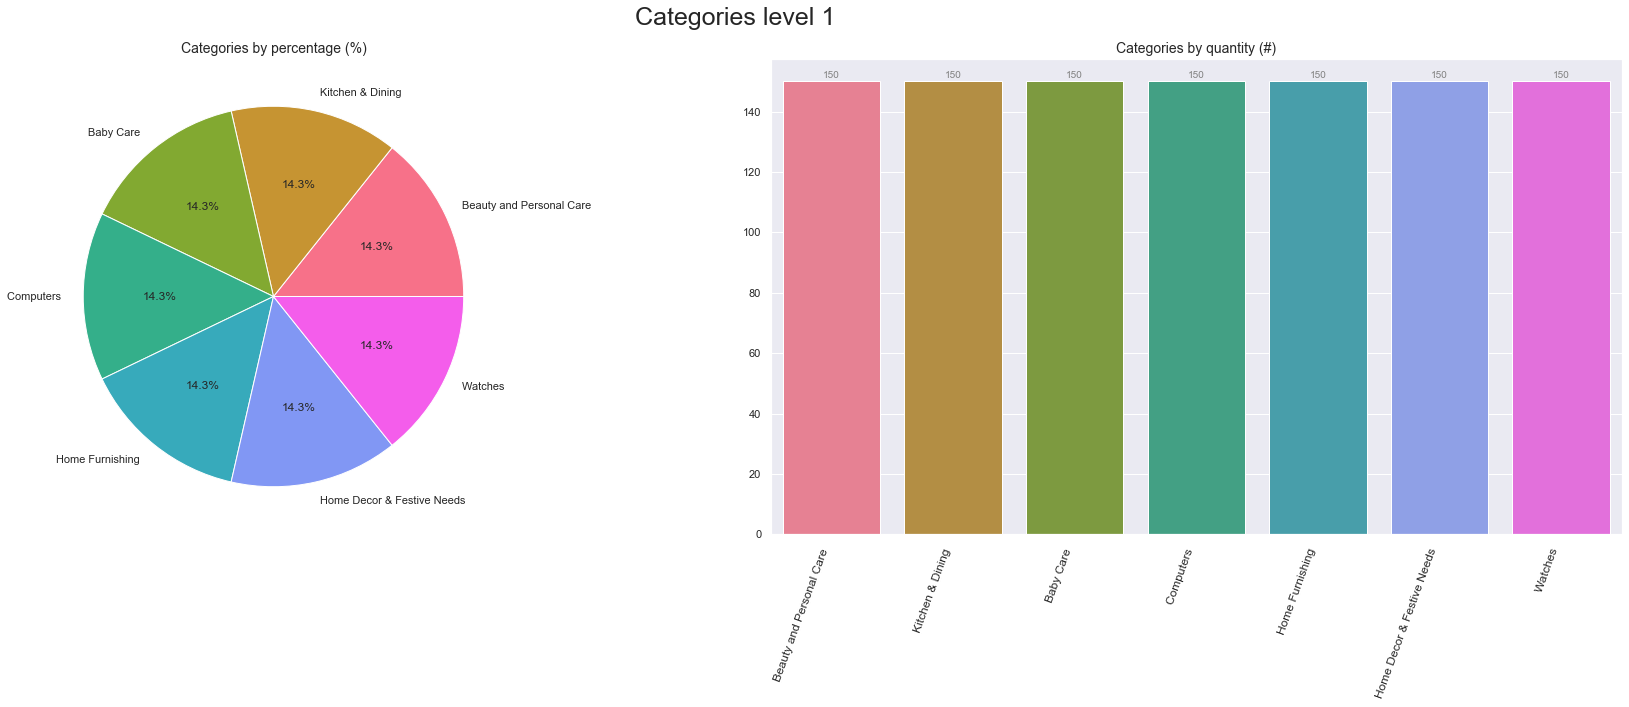

In [164]:
barplot_and_pie(df_data["category_1"], "Categories level 1", "Categories")

63


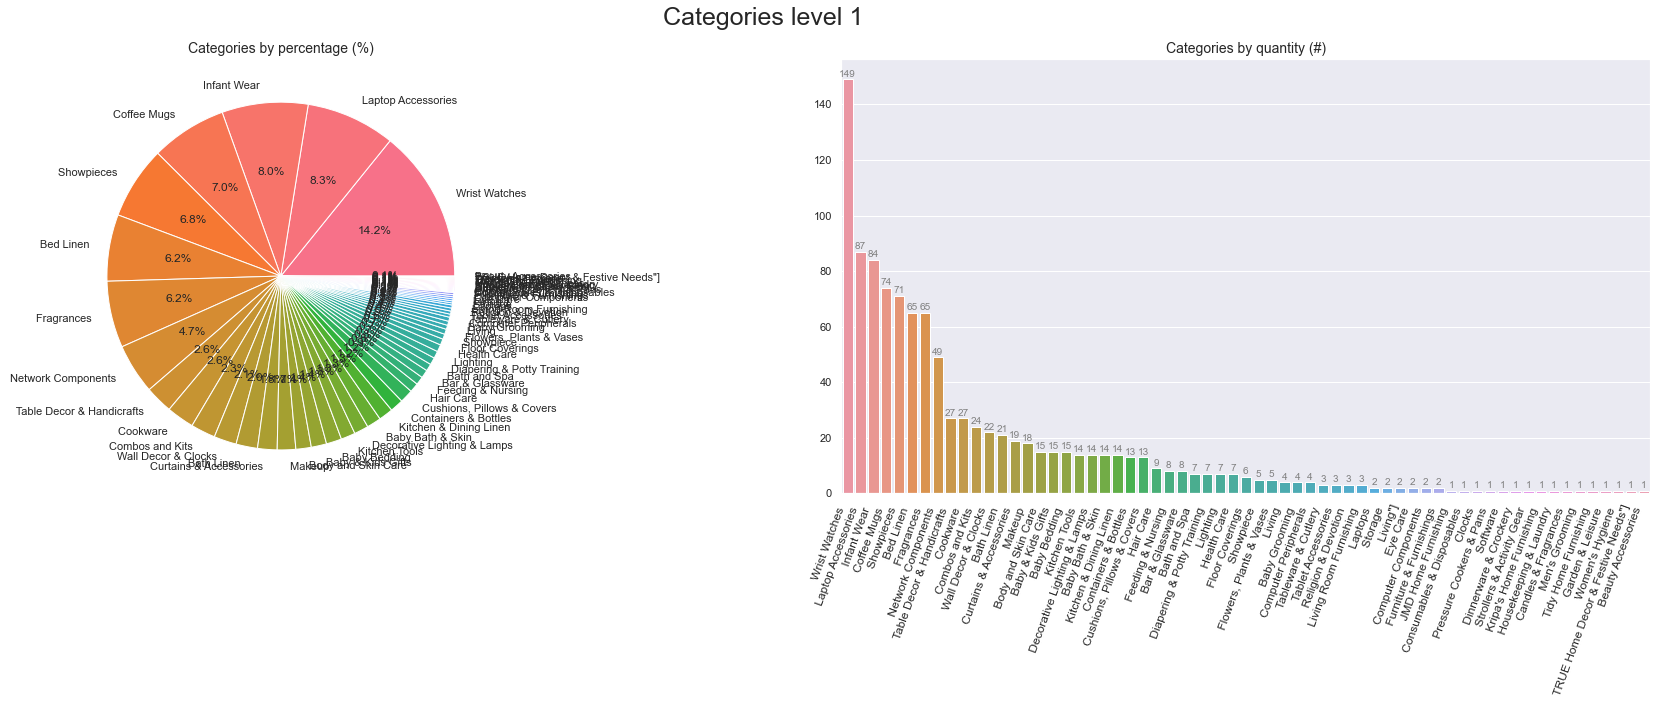

In [165]:
barplot_and_pie(df_data["category_2"], "Categories level 1", "Categories")

In [47]:
# barplot_and_pie(df_data["category_1"])

In [71]:
data_piechart = df_data["category_1"].sort_values(ascending=False).value_counts().values
labels_piechart = df_data["category_1"].sort_values(ascending=False).value_counts().index.tolist()
textprops = dict(size=16, color="gray")
colors = ["#5975A4", "#CC8963", "#5F9E6E", "#AD5B5E", "#857AAB", "#AD5B5E", "#857AAB"]
explode = (0, 0, 0, 0, 0, 0, 0)

In [72]:
categories_1 = df_data["category_1"].value_counts()
categories_1 

Beauty and Personal Care       150
Kitchen & Dining               150
Baby Care                      150
Computers                      150
Home Furnishing                150
Home Decor & Festive Needs     150
Watches                        150
Name: category_1, dtype: int64

In [73]:
sns.set_palette(sns.color_palette("husl", len(df_data["category_1"].value_counts())))

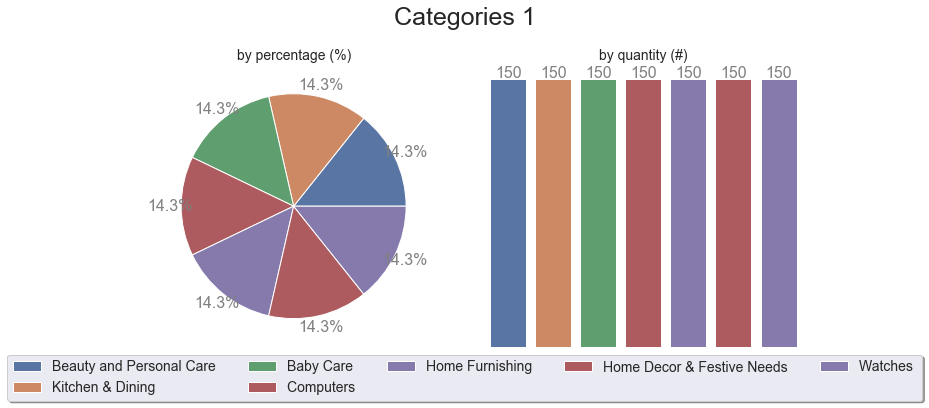

In [74]:
fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=[10,5])

fig.suptitle("Categories 1", size=25)

for lb, data, color in zip(labels_piechart, data_piechart, colors):
    ax2.bar(lb, data, label=lb, color=color)
for index, data in enumerate(data_piechart):
    plt.text(x=index, y=data+1 , s=f"{data}", horizontalalignment="center", fontdict=dict(fontsize=16, color="gray"))
ax2.set_title("by quantity (#)", fontsize=14)
ax2.axis('off')

ax1.pie(x=data_piechart, explode=explode, autopct="%1.1f%%", pctdistance=1.10, 
        textprops=textprops, colors=[color for color in colors], startangle=0)
ax1.set_title("by percentage (%)", fontsize=14)

fig.legend(labels_piechart, loc="center", ncol=5, fontsize=14, bbox_to_anchor=(0.5, -0.05), fancybox=True, shadow=True)

plt.tight_layout()
# plt.savefig("images/Orders-reviews.png")
plt.show()

In [ ]:
fig = plt.figure(1, figsize=(40, 8))
categories_2 = df_data["category_2"].value_counts()

plt.title("Categories 2")

sns.set_palette(sns.color_palette("husl", len(categories_2)))

# Barplot 
plt.subplot(1, 2, 1)

sns.barplot(categories_2.index, categories_2.values, orient="v")
plt.xticks(rotation=90)
plt.show()

In [ ]:
df_samir = df_data

In [ ]:
empty_cols

In [ ]:
df_analysis(df_samir, "df_samir", type_analysis="complete")